## <center> AGE OF EMPIRES II: DE PATCH 46295 - ARABIA 1v1</center>

![46295](https://static.ageofempires.com/aoe/wp-content/uploads/2021/03/2021.03.24-PHOENIX_Update-46295.jpg)

### ANÁLISIS EXPLORATORIO DE LOS DATOS.

#### LIBRERÍAS UTILIZADAS.

In [1]:
## Importación de datos.
from sqlalchemy import create_engine

## Tratamiento de datos.
import pandas as pd
import numpy as np

## Gráficos.
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 14, 10

## Configuración warnings.
import warnings
warnings.filterwarnings('ignore')

#### QUERY A LA BBDD DE MARIADB.

In [2]:
# Nombre de usuario, contraseña y BBDD MySQL.
mysql_address = 'xxx.xxx.xxx.xxx'
mysql_port = 'xxx'
mysql_username = 'xxx'
mysql_password = 'xxx'
mysql_dbname = 'xxx'

# String que contiene la información necesaria para el login de MySQL.
mysql_str = ('mysql+pymysql://{username}:{password}@{ipaddress}:{port}/{dbname}'
.format(username = mysql_username,
password = mysql_password,
ipaddress = mysql_address,
port = mysql_port,
dbname = mysql_dbname))

In [3]:
# Query para importar los datos desde MySQL.
cnx = create_engine(mysql_str)
query = f"""
SELECT
        matches.match_id,
        matches.version,
        matches.server,
        matches.duration_minutes,
        players.profile_id,
        players.player_name,
        players.country,
        players.rating,
        players.color,
        players.team,
        players.civ,
        players.won
FROM
    matches, players
WHERE
    matches.match_id = players.match_id
AND
    matches.version = '46295'
AND
    matches.map_type = 'Arabia'
AND
    matches.rating_type = '1v1 Random Map'
"""
df = pd.read_sql_query(query, con=cnx)
df.shape

(985721, 12)

#### PREVISUALIZACIÓN DEL DATASET.

In [4]:
# Observamos los primeros 10 valores para ver que se han cargado correctamente.
df.head(10)

,match_id,version,server,duration_minutes,profile_id,player_name,country,rating,color,team,civ,won
0,79168372,46295,ukwest,20,1614015,[M1T1] IlGrandeGherpy,IT,1362.0,blue,2,Aztecs,1
1,79168372,46295,ukwest,20,2475419,colinc126,IE,1304.0,red,1,Magyars,0
2,79169030,46295,westeurope,38,1303753,Konpitsa,GR,1025.0,red,1,Slavs,0
3,79169030,46295,westeurope,38,2852050,ol3sti,TR,1084.0,blue,2,Mongols,1
4,79169421,46295,ukwest,17,230040,MikaVerLeth,DE,1047.0,blue,2,Lithuanians,1
5,79169421,46295,ukwest,17,2298698,Barnibo,FR,1006.0,red,1,Koreans,0
6,79169705,46295,eastus,14,3684413,大屁股NoMalarkeyMitch大屁股,US,1044.0,cyan,2,Britons,1
7,79169705,46295,eastus,14,4995855,SatellarKnight,MX,1031.0,yellow,1,Magyars,0
8,79169826,46295,ukwest,22,1798388,Terry_Bryant,ES,738.0,yellow,1,Chinese,0
9,79169826,46295,ukwest,22,4299449,Shevrarske,TR,755.0,blue,2,Lithuanians,1


In [5]:
# Comprobación de valores NaN en el dataset.
df.isna().sum()

match_id                0
version                 0
server                  0
duration_minutes        0
profile_id              0
player_name             1
country             52385
rating              48868
color                   4
team                    0
civ                     0
won                     0
dtype: int64

In [6]:
# Rellenar valores vacíos de las varibales "color" y "country".
df.color.fillna("unknown", inplace=True)
df.country.fillna("UNKNOWN", inplace=True)

In [7]:
total_partidas                          = len(df.match_id.unique())
print("Total partidas: " + str(total_partidas))

Total partidas: 492861


#### Civilizaciones.

In [8]:
# Obtener los valores únicos de la variable "civ".
sorted_civs = df.civ.unique().tolist()
sorted_civs.sort()

In [9]:
def get_frequency_rates_by_civ(df):
    return pd.DataFrame(df.civ.value_counts(normalize=True)).reset_index().rename(columns={"index": "civ", "civ": "frequency"})

In [10]:
frequency_civs_singleplayer = get_frequency_rates_by_civ(df)

In [11]:
def get_win_rates_by_civ(df):
    return (
        df.groupby("civ")["won"]
            .mean()
            .reset_index()
            .rename(columns={"won": "win_rate"})
            .sort_values("win_rate", ascending=False)
            .reset_index(drop=True)
    )

In [12]:
winrate_civs_singleplayer = get_win_rates_by_civ(df)

#### Colores.

In [13]:
# Obtener los valores únicos de la variable "color".
sorted_colors = df.color.unique().tolist()
sorted_colors.sort()

In [14]:
def get_frequency_rates_by_color(df):
    return pd.DataFrame(df.color.value_counts(normalize=True)).reset_index().rename(columns={"index": "color", "color": "frequency"})

In [15]:
frequency_colors_singleplayer = get_frequency_rates_by_color(df)

#### Servidores.

In [16]:
# Obtener los valores únicos de la variable "server".
sorted_servers = df.server.unique().tolist()
sorted_servers.sort()

In [17]:
def get_frequency_rates_by_server(df):
    return pd.DataFrame(df.server.value_counts(normalize=True)).reset_index().rename(columns={"index": "server", "server": "frequency"})

In [18]:
frequency_server_singleplayer = get_frequency_rates_by_server(df)

#### Países.

In [19]:
# Obtener los valores únicos de la variable "country".
sorted_countries= df.country.unique().tolist()
sorted_countries.sort()

In [20]:
def get_frequency_rates_by_country(df):
    return pd.DataFrame(df.country.value_counts(normalize=True)).reset_index().rename(columns={"index": "country", "country": "frequency"})

In [21]:
frequency_country_singleplayer = get_frequency_rates_by_country(df)

#### ANÁLISIS PARTIDAS 1v1.

In [22]:
# Comprobación de valores NaN de cada variable.
df.isna().sum()

match_id                0
version                 0
server                  0
duration_minutes        0
profile_id              0
player_name             1
country                 0
rating              48868
color                   0
team                    0
civ                     0
won                     0
dtype: int64

In [23]:
df.describe()

,match_id,version,duration_minutes,profile_id,rating,team,won
count,9.857210e+05,985721.0,985721.000000,9.857210e+05,936853.000000,985721.000000,985721.000000
mean,8.409300e+07,46295.0,24.351126,2.528112e+06,1167.022591,1.499999,0.499999
std,2.744888e+06,0.0,11.136739,1.608427e+06,294.187958,0.500000,0.500000
min,7.916837e+07,46295.0,0.000000,1.320000e+02,0.000000,1.000000,0.000000
25%,8.172446e+07,46295.0,17.000000,1.099653e+06,963.000000,1.000000,0.000000
50%,8.416716e+07,46295.0,24.000000,2.442964e+06,1123.000000,1.000000,0.000000
75%,8.636986e+07,46295.0,31.000000,3.799386e+06,1326.000000,2.000000,1.000000
max,8.892586e+07,46295.0,238.000000,5.681179e+06,2609.000000,2.000000,1.000000


Text(0.5, 0, 'ELO')

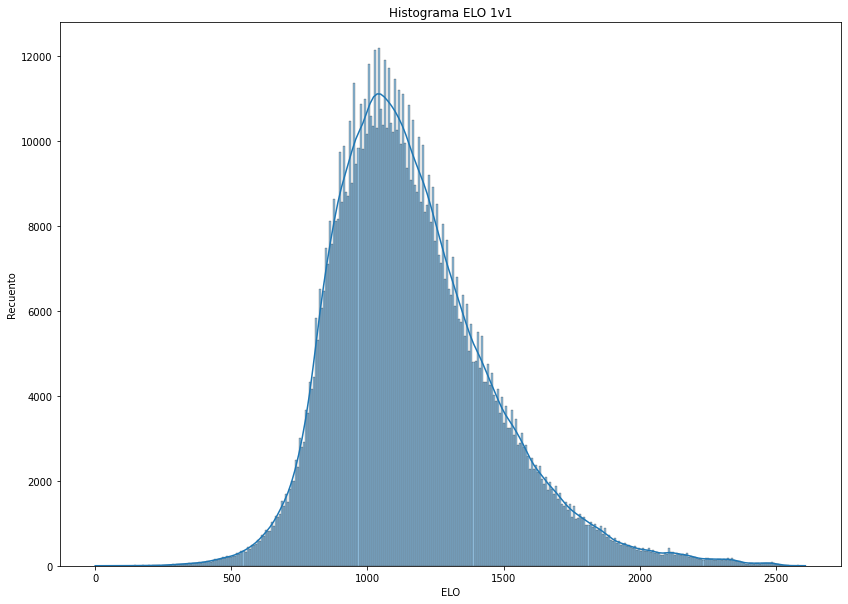

In [24]:
ax = sns.histplot(df.rating, stat="count", kde="True")
ax.set_title('Histograma ELO 1v1')
ax.set_ylabel('Recuento')
ax.set_xlabel('ELO')

<AxesSubplot:xlabel='rating'>

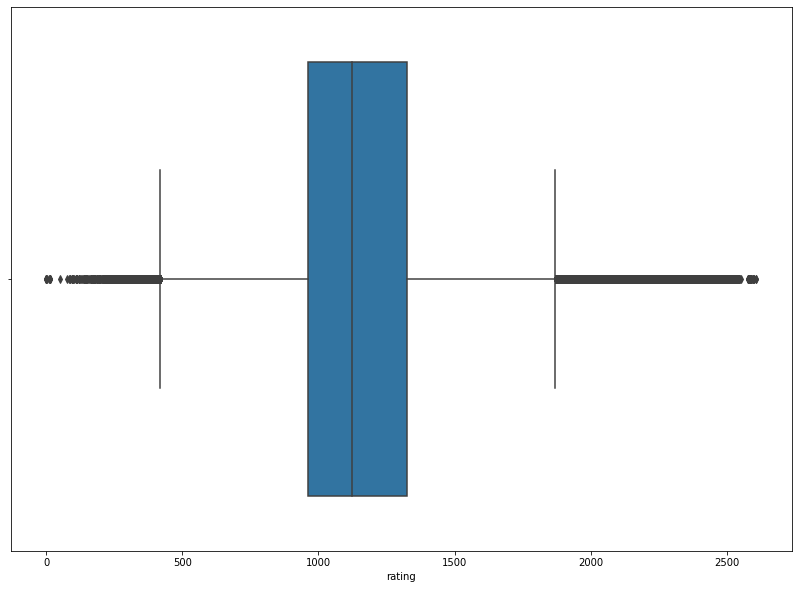

In [25]:
sns.boxplot(df.rating)

Text(0.5, 0, 'Duración en minutos')

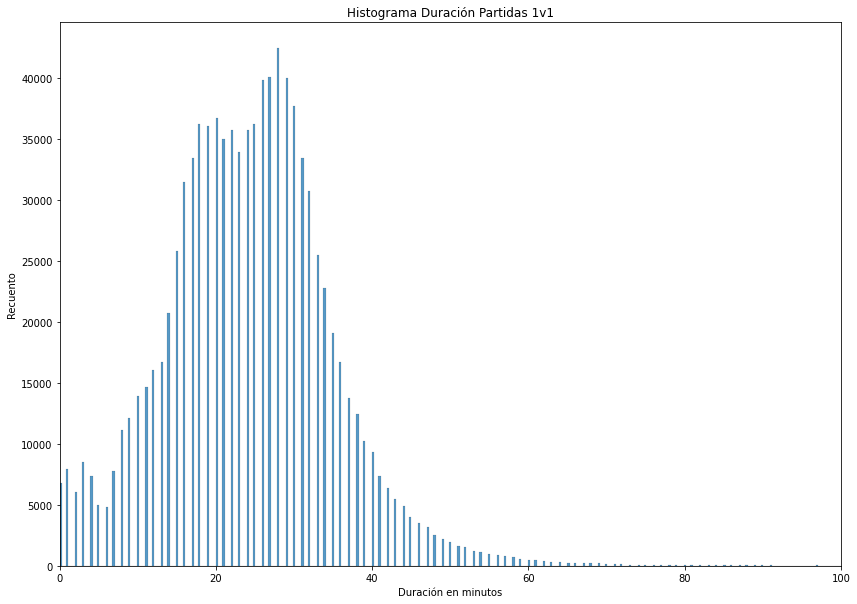

In [26]:
ax = sns.histplot(df.duration_minutes)
plt.xlim(0, 100)
ax.set_title('Histograma Duración Partidas 1v1')
ax.set_ylabel('Recuento')
ax.set_xlabel('Duración en minutos')

<AxesSubplot:xlabel='duration_minutes'>

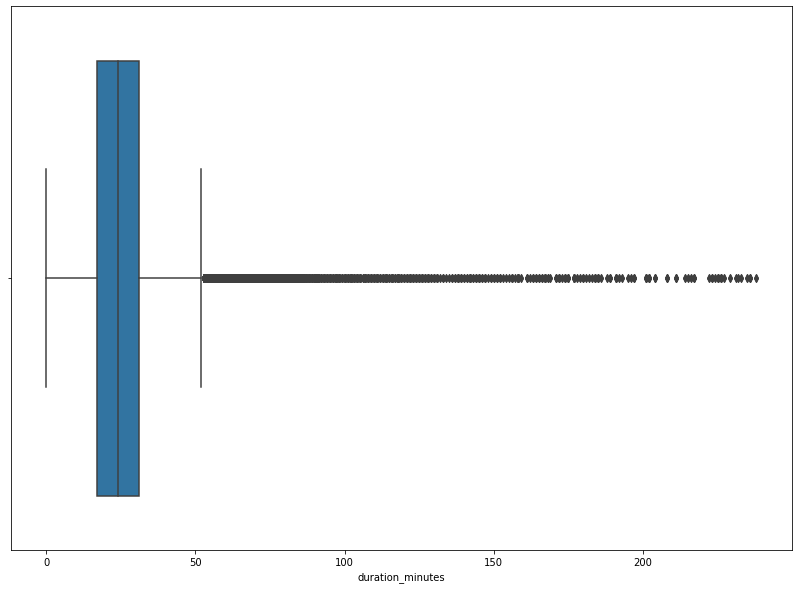

In [27]:
sns.boxplot(df.duration_minutes)

Text(0.5, 1.0, '% de Uso de Civilizaciones en partidas 1v1')

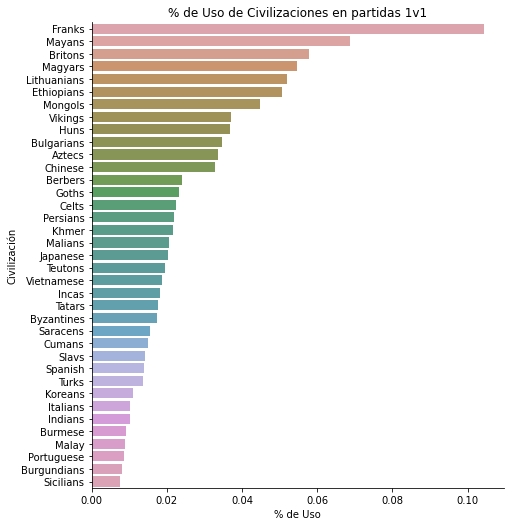

In [28]:
sns.catplot(y="civ", x="frequency",  data=frequency_civs_singleplayer, saturation=.5, kind="bar", ci=None, aspect=1, height=7)
plt.ylabel("Civilización")
plt.xlabel("% de Uso")
plt.title("% de Uso de Civilizaciones en partidas 1v1")

Text(0.5, 1.0, 'Porcentaje de Victorias de Civilizaciones en partidas 1v1')

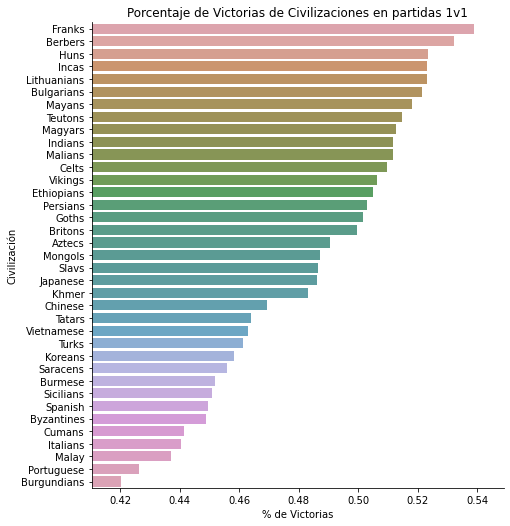

In [29]:
sns.catplot(y="civ", x="win_rate",  data=winrate_civs_singleplayer, saturation=.5, kind="bar", ci=None, aspect=1, height=7)
plt.ylabel("Civilización")
plt.xlabel("% de Victorias")
lim_sup = float(winrate_civs_singleplayer.win_rate.head(1) + 0.01)
lim_inf = float(winrate_civs_singleplayer.win_rate.tail(1) - 0.01)
plt.xlim(lim_inf, lim_sup)
plt.title("Porcentaje de Victorias de Civilizaciones en partidas 1v1")

Text(0.5, 1.0, '% de Partidas por Color en partidas 1v1')

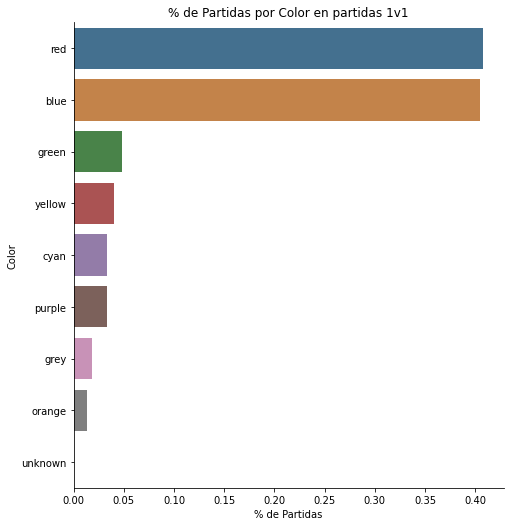

In [30]:
sns.catplot(y="color", x="frequency",  data=frequency_colors_singleplayer, saturation=.5, kind="bar", ci=None, aspect=1, height=7)
plt.ylabel("Color")
plt.xlabel("% de Partidas")
plt.title("% de Partidas por Color en partidas 1v1")

Text(0.5, 1.0, '% de Partidas por Servidor en partidas 1v1')

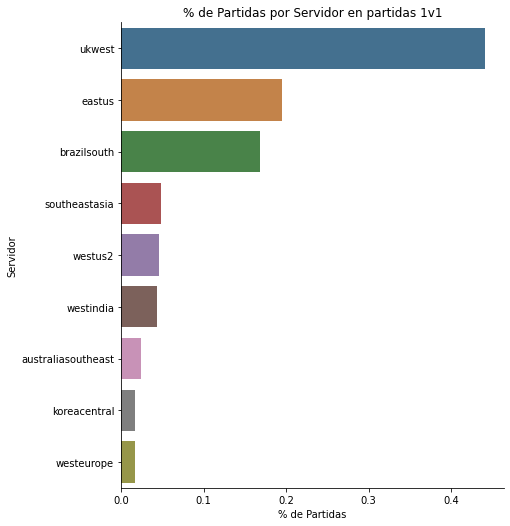

In [31]:
sns.catplot(y="server", x="frequency",  data=frequency_server_singleplayer, saturation=.5, kind="bar", ci=None, aspect=1, height=7)
plt.ylabel("Servidor")
plt.xlabel("% de Partidas")
plt.title("% de Partidas por Servidor en partidas 1v1")

Text(0.5, 1.0, '% de Partidas por Nacionalidad en partidas 1v1')

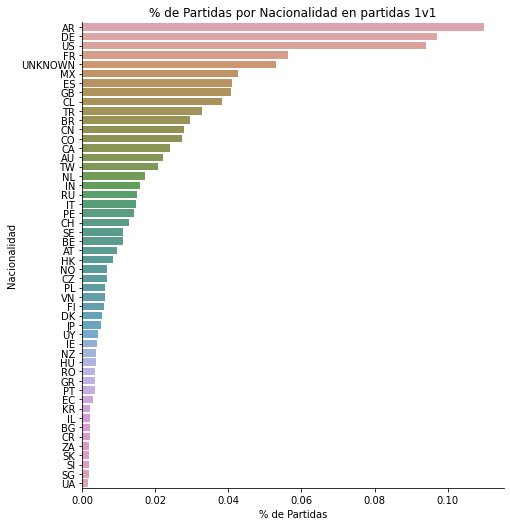

In [32]:
frequency_country_singleplayer = frequency_country_singleplayer.head(50)
sns.catplot(y="country", x="frequency",  data=frequency_country_singleplayer, saturation=.5, kind="bar", ci=None, aspect=1, height=7)
plt.ylabel("Nacionalidad")
plt.xlabel("% de Partidas")
plt.title("% de Partidas por Nacionalidad en partidas 1v1")

In [33]:
renames_singleplayer = {
    "profile_id": "opponent",
    "civ": "opponent_civ",
}
opponents_singleplayer = df[["match_id", "profile_id", "civ"]].rename(columns=renames_singleplayer)
vs_df = pd.merge(df, opponents_singleplayer, left_on="match_id", right_on="match_id").rename(columns={"profile_id": "player"})

# Dado que hemos fusionado el mismo marco de datos un jugador será un oponente de sí mismo, debemos eliminar esas filas.
vs_df = vs_df[vs_df["player"] != vs_df["opponent"]]
vs_df = vs_df[["match_id", "player", "opponent", "civ", "opponent_civ", "won"]]

In [34]:
vs_df.head(6)

,match_id,player,opponent,civ,opponent_civ,won
1,79168372,1614015,2475419,Aztecs,Magyars,1
2,79168372,2475419,1614015,Magyars,Aztecs,0
5,79169030,1303753,2852050,Slavs,Mongols,0
6,79169030,2852050,1303753,Mongols,Slavs,1
9,79169421,230040,2298698,Lithuanians,Koreans,1
10,79169421,2298698,230040,Koreans,Lithuanians,0


In [35]:
# Matriz cuadrada del porcentaje de victorias de civilizaciones vs el resto de civilizaciones.
win_vs_singleplayer = vs_df.pivot_table(values="won", index="civ", columns="opponent_civ")
win_vs_singleplayer.head(10)

opponent_civ,Aztecs,Berbers,Britons,Bulgarians,Burgundians,Burmese,Byzantines,Celts,Chinese,Cumans,...,Portuguese,Saracens,Sicilians,Slavs,Spanish,Tatars,Teutons,Turks,Vietnamese,Vikings
civ,,,,,,,,,,,,,,,,,,,,,
Aztecs,0.500000,0.500657,0.506974,0.417582,0.598592,0.501779,0.559292,0.476312,0.529637,0.572565,...,0.507692,0.534483,0.452107,0.462527,0.511983,0.561939,0.448657,0.527594,0.537338,0.450041
Berbers,0.499343,0.500000,0.547112,0.527704,0.582418,0.551220,0.534351,0.511152,0.595336,0.596386,...,0.645455,0.506361,0.568720,0.575342,0.583051,0.635714,0.514815,0.578947,0.614865,0.521837
Britons,0.493026,0.452888,0.500000,0.490782,0.567929,0.560669,0.582934,0.502078,0.560420,0.562427,...,0.594937,0.559538,0.521445,0.526841,0.569737,0.557114,0.523330,0.519841,0.530452,0.527604
Bulgarians,0.582418,0.472296,0.509218,0.500000,0.607261,0.627119,0.590988,0.574772,0.538955,0.621572,...,0.562044,0.530333,0.603306,0.525210,0.558763,0.498299,0.478605,0.549784,0.544286,0.510189
Burgundians,0.401408,0.417582,0.432071,0.392739,0.500000,0.487805,0.496403,0.401070,0.434599,0.569106,...,0.556962,0.400000,0.475410,0.480916,0.442105,0.456376,0.392157,0.375000,0.469388,0.394464
Burmese,0.498221,0.448780,0.439331,0.372881,0.512195,0.500000,0.607843,0.432836,0.432787,0.493243,...,0.537736,0.432624,0.574468,0.533784,0.503106,0.348387,0.448276,0.489796,0.422360,0.429054
Byzantines,0.440708,0.465649,0.417066,0.409012,0.503597,0.392157,0.500000,0.408867,0.497238,0.489051,...,0.557576,0.516000,0.407143,0.436975,0.498113,0.509934,0.456825,0.467213,0.490463,0.397906
Celts,0.523688,0.488848,0.497922,0.425228,0.598930,0.567164,0.591133,0.500000,0.570225,0.614035,...,0.521739,0.577982,0.562130,0.556962,0.506098,0.542929,0.478803,0.547771,0.534351,0.475854
Chinese,0.470363,0.404664,0.439580,0.461045,0.565401,0.567213,0.502762,0.429775,0.500000,0.513636,...,0.552941,0.533613,0.532751,0.486081,0.525164,0.499160,0.464789,0.521839,0.503584,0.468826


Text(0.5, 1.0, 'Porcentaje de Victorias de cada Civilización vs el resto de Civilizaciones')

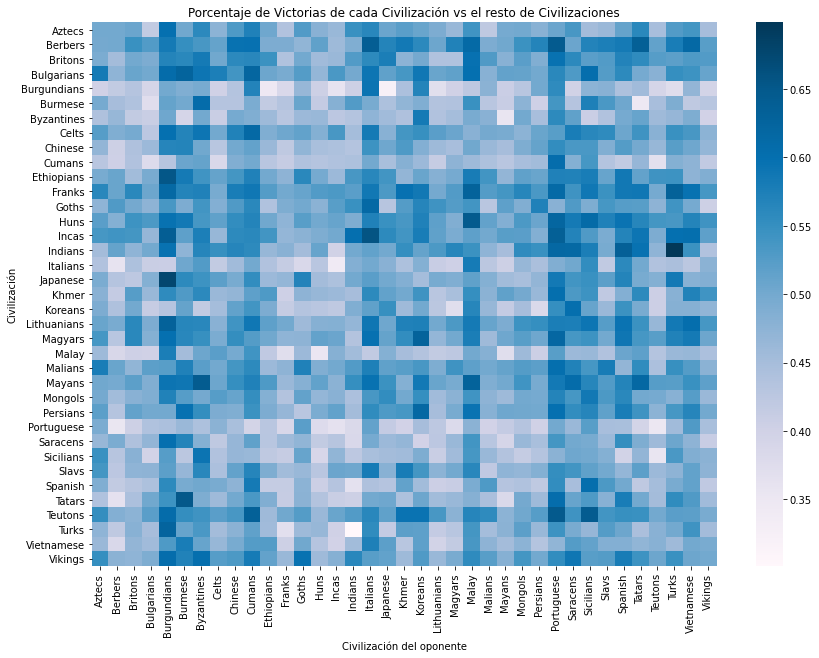

In [36]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 10
sns.heatmap(win_vs_singleplayer, cmap="PuBu")
plt.ylabel("Civilización")
plt.xlabel("Civilización del oponente")
plt.title("Porcentaje de Victorias de cada Civilización vs el resto de Civilizaciones")

In [37]:
melted_win_vs_singleplayer = win_vs_singleplayer.unstack().reset_index().rename(columns={0: "win_rate"})
melted_win_vs_singleplayer.sort_values("win_rate").nlargest(10, columns="win_rate").reset_index(drop=True)
melted_win_vs_singleplayer = melted_win_vs_singleplayer[["civ", "opponent_civ", "win_rate"]]
melted_win_vs_singleplayer.nlargest(21, columns="win_rate").reset_index(drop=True)

,civ,opponent_civ,win_rate
0,Indians,Turks,0.698718
1,Japanese,Burgundians,0.676259
2,Incas,Italians,0.657609
3,Ethiopians,Burgundians,0.653207
4,Tatars,Burmese,0.651613
5,Teutons,Portuguese,0.648485
6,Huns,Malay,0.646104
7,Berbers,Portuguese,0.645455
8,Mayans,Byzantines,0.643911
9,Teutons,Sicilians,0.642857
